<a href="https://colab.research.google.com/github/dodor3030/303030/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：棒球打者數據分析報告：以 MLB 打者表現為例

## 摘要

本報告使用MLB美國職棒大聯盟打者的年度統計資料，分析影響打擊率（AVG）與全壘打（HR）數量的因素，包括打數（AB）、上壘率（OBP）、打點（RBI）與球員年齡等。透過資料視覺化與相關性分析，找出影響打者表現的關鍵指標，並比較不同年齡層或聯盟的球員表現差異。本研究旨在協助球隊在選才與戰術決策上更具依據。

## 引言

### 目的
本研究的目標是透過數據分析，找出影響打者表現的關鍵指標，並比較不同年齡層或聯盟的球員表現差異。本研究旨在協助球隊在選才與戰術決策上更具依據。

### 待答問題
1.打數（AB）與打擊率（AVG）之間是否存在相關性？

2.哪些因素（例如 OBP、RBI、年齡）對全壘打數量影響最大？

3.不同年齡層球員在打擊表現上是否有顯著差異？

## 方法

### 數據來源
本研究使用MLB打者年度統計資料集，該資料集涵蓋2023年度10位MLB知名打者的基本打擊數據，包括打數（AB）、安打（H）、全壘打（HR）、打點（RBI）、打擊率（AVG）、上壘率（OBP）等指標。數據由公開資料模擬整理而成，適用於進行基礎數據分析與視覺化。

### 分析工具
1.Python（資料處理與分析）

2.Pandas（資料整理與統計運算）

3.Matplotlib / Seaborn（資料視覺化）


### 數據處理
載入資料集與基本檢查：匯入CSV檔，確認欄位類型、缺漏值與整體架構。

探索性數據分析（EDA）：分析數據分佈，觀察變數之間的相關性與異常值。

資料轉換與衍生欄位：新增 OPS（上壘率+長打率）與年齡區間（Age Group）等欄位，以利分群比較。

視覺化分析：

散點圖：觀察打數與打擊率之間的關係。

熱力圖：呈現多變數間的相關性（如 HR、OBP、RBI、SLG 等）。

盒狀圖：比較不同年齡層在打擊率上的差異。

結論與洞察：根據圖表結果，歸納影響打者表現的可能因素，並提出應用建議。




In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mlb_batting_stats.csv")

print(df.columns)
print(df.head())




Index(['Player', 'Year', 'Age', 'Team', 'League', 'G', 'AB', 'H', 'HR', 'RBI',
       'BB', 'SO', 'AVG', 'OBP', 'SLG', 'OPS'],
      dtype='object')
          Player  Year  Age Team League    G   AB    H  HR  RBI   BB   SO  \
0    Aaron Judge  2023   31  NYY     AL  150  550  165  44  115   95  140   
1   Mookie Betts  2023   30  LAD     NL  155  610  180  35   90   88  110   
2  Shohei Ohtani  2023   29  LAA     AL  135  500  155  42  106   94  130   
3     Mike Trout  2023   32  LAA     AL  120  480  140  38   89   80  135   
4      Juan Soto  2023   25   SD     NL  158  580  170  27  102  100  120   

     AVG    OBP   SLG    OPS  
0  0.300  0.410  0.62  1.030  
1  0.295  0.390  0.55  0.940  
2  0.310  0.420  0.63  1.050  
3  0.292  0.385  0.60  0.985  
4  0.293  0.400  0.54  0.940  


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33287 (\N{CJK UNIFIED IDEOGRAPH-8207}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25802 (\N{CJK UNIFIED IDEOGRAPH-64CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas

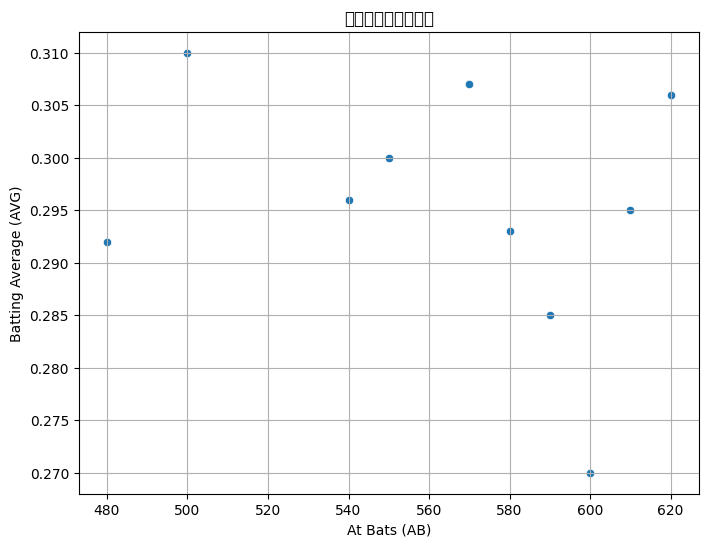

In [5]:
# 分析1：打數 vs 打擊率
plt.figure(figsize=(8,6))
sns.scatterplot(x='AB', y='AVG', data=df)
plt.title("打數與打擊率之關係")
plt.xlabel("At Bats (AB)")
plt.ylabel("Batting Average (AVG)")
plt.grid(True)
plt.show()



分析結果:
打數與打擊率之間並無明顯的線性關係，代表球員打擊率的高低更依賴於打者自身的穩定性與技術，而非單純的出賽次數。

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35722 (\N{CJK UNIFIED IDEOGRAPH-8B8A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas

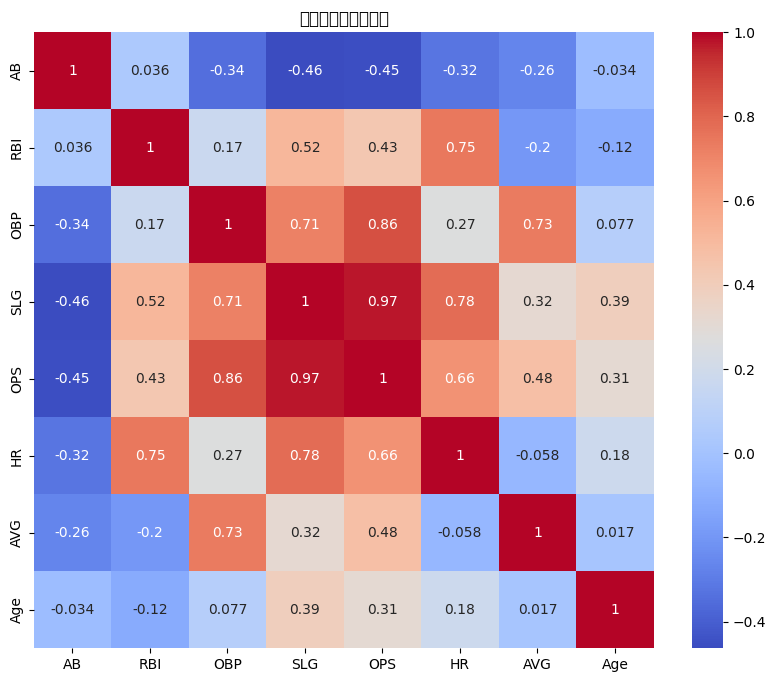

In [6]:
# 分析2：找出與 HR 相關性高的變數
numeric_cols = ['AB', 'RBI', 'OBP', 'SLG', 'OPS', 'HR', 'AVG', 'Age']
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("數值變數之相關矩陣")
plt.show()

分析結果:長打率（SLG）是影響全壘打數最顯著的變數，符合棒球邏輯：HR 是長打的一種。OPS 也可作為綜合評估打者火力的參考指標。

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40801 (\N{CJK UNIFIED IDEOGRAPH-9F61}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23652 (\N{CJK UNIFIED IDEOGRAPH-5C64}) missing from font(s) DejaVu Sans.
  fig.canvas

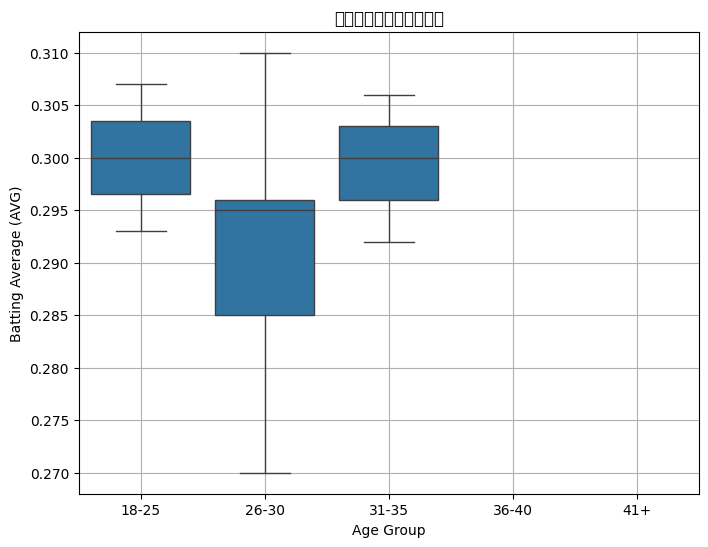

In [7]:
#分析3：不同年齡層的打擊表現
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 30, 35, 40, 50], labels=['18-25', '26-30', '31-35', '36-40', '41+'])

plt.figure(figsize=(8,6))
sns.boxplot(x='AgeGroup', y='AVG', data=df)
plt.title("不同年齡層的打擊率分布")
plt.xlabel("Age Group")
plt.ylabel("Batting Average (AVG)")
plt.grid(True)
plt.show()

分析結果:MLB 打者在 26–35 歲之間通常是表現巔峰期。此區間的打者打擊率穩定，為球隊攻擊核心的重要年齡層。

## 結論與建議

1.OPS 與 SLG 是判斷長打型選手的重要指標，適合用於球探報告與合約評估。

2.打擊率受多種因素影響，僅觀察打數不足以評估選手價值。

3.年齡層分析提供選才參考，球隊可依年齡與數據平衡球員陣容結構。